In [115]:
# Imports
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
import datetime
import time
import numpy as np
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras import regularizers
from keras.callbacks import EarlyStopping

np.random.seed(7)

# Constants
TRAIN_AND_VALIDATION_TEST_SPLIT = 0.3
VALID_AND_TEST_SPLIT            = 0.5
BATCH_SIZE                      = 100

# All posible relevent attributes
relevent_attributes=["Priority","RaisedByID","AssignedToID","StatusCode",\
                     "ProjectCode","Category","SubCategory","HoursEstimate","HoursActual","AuthorisedByID"]
X_attributes=["Priority","RaisedByID","AssignedToID","StatusCode",\
                     "ProjectCode","Category","SubCategory","HoursEstimate","AuthorisedByID"]


# The attributes that make the best accuarcy for the models
relevent_attributes=["Priority","AssignedToID","StatusCode",\
                     "SubCategory","HoursEstimate","HoursActual"]
X_attributes=["Priority","AssignedToID","StatusCode",\
                     "SubCategory","HoursEstimate"]
Y_attributes=["HoursActual"]

%matplotlib inline  

In [116]:
def set_curr_time():
    dt = datetime.datetime.now()
    curr_dt = '{0}{1}{2}_{3}_{4}'.format(datetime.datetime.now().year, datetime.datetime.now().month,
                                       datetime.datetime.now().day, datetime.datetime.now().hour,
                                      datetime.datetime.now().minute)
    return curr_dt

## Machine Learning

In [117]:
data = pd.read_csv('../SiP_dataset-master/SIP_CAT_GAUS.csv', encoding='cp1252') 
data.fillna(0, inplace = True)

data.head()
data.describe()

,Unnamed: 0,Priority,RaisedByID,AssignedToID,AuthorisedByID,StatusCode,ProjectCode,Category,SubCategory,HoursEstimate,HoursActual
count,12299.000000,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04,1.229900e+04
mean,6149.000000,1.848717e-17,8.319225e-17,1.178557e-16,2.773075e-17,-3.697434e-17,-2.033588e-16,5.546150e-17,-1.201666e-16,4.621792e-17,-9.243584e-18
std,3550.559815,1.000041e+00,1.000041e+00,1.000041e+00,5.889010e-01,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00,1.000041e+00
min,0.000000,-6.839360e-01,-1.817993e+00,-1.928330e+00,-2.113198e+00,-2.854560e+00,-2.807881e+00,-6.513367e-01,-1.412901e+00,-3.516581e-01,-1.915761e-01
25%,3074.500000,-6.839360e-01,-1.062657e+00,-8.126678e-01,0.000000e+00,-5.174389e-01,-6.273901e-01,-6.513367e-01,-9.425033e-01,-3.173315e-01,-1.771702e-01
50%,6149.000000,-6.839360e-01,2.465911e-01,2.498672e-01,0.000000e+00,-5.174389e-01,-1.428367e-01,-6.513367e-01,-3.153067e-01,-2.479848e-01,-1.480674e-01
75%,9223.500000,4.788687e-01,1.052282e+00,1.099895e+00,0.000000e+00,1.040642e+00,5.839935e-01,6.721046e-01,6.254883e-01,-1.092915e-01,-6.803464e-02
max,12298.000000,4.548685e+00,1.505484e+00,1.471783e+00,6.569847e-01,2.598723e+00,1.795377e+00,1.995546e+00,2.193480e+00,3.120073e+01,3.604361e+01


In [118]:
data = data[relevent_attributes]
ROW_COUNT = max(data.count())
data.head()

,Priority,AssignedToID,StatusCode,SubCategory,HoursEstimate,HoursActual
0,-0.683936,1.099895,1.040642,-0.315307,0.133422,-0.166257
1,-0.683936,0.249867,1.040642,-0.315307,-0.109292,-0.089862
2,-0.102534,1.099895,1.040642,-0.001708,-0.327734,-0.181536
3,1.641673,0.249867,1.040642,-1.256102,-0.327734,-0.181536
4,4.548685,-1.290809,1.040642,-1.256102,-0.230648,-0.140792


In [119]:
# HoursEstimate_filter=HoursEstimate[HoursEstimate["HoursEstimate"]<200]
# HoursEstimate_filter=HoursEstimate_filter[HoursEstimate_filter["HoursActual"]<800]

x_train_label, xx_test_label, y_train_label, yy_test_label \
              = train_test_split(data[X_attributes].values[:], data[Y_attributes].values[:], test_size=TRAIN_AND_VALIDATION_TEST_SPLIT)
x_valid_label, x_test_label, y_valid_label, y_test_label \
              = train_test_split(xx_test_label, yy_test_label, test_size=VALID_AND_TEST_SPLIT)  

print("Train examples: {}".format(x_train_label.shape))
print("Valid examples: {}".format(x_valid_label.shape))
print("Test examples: {}".format(x_test_label.shape))

Train examples: (8609, 5)
Valid examples: (1845, 5)
Test examples: (1845, 5)


In [120]:
x_test_label.shape

(1845, 5)

In [121]:

model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(2048, kernel_initializer='normal'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation(activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.8),
#     tf.keras.layers.Dense(1024,  kernel_initializer='normal'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation(activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.8),
#     tf.keras.layers.add(tf.keras.layers.Flatten(input_shape = (BATCH_SIZE,x_train_label.shape[1],1))),
    tf.keras.layers.Dense(4096, kernel_initializer='normal',input_shape = (x_train_label.shape[1],)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(1024, kernel_initializer='normal'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(512, kernel_initializer='normal'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(64, kernel_initializer='normal'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(1)
    
    
#     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(256, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(1)
])

In [127]:

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

curr_dt = set_curr_time()
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='../logs/{0}'.format(curr_dt), histogram_freq=0, write_graph=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=100)

tic = time.time()
model.fit(
    x_train_label,
    y_train_label,
    epochs = 350,
    batch_size = x_train_label.shape[0],
    validation_data = (x_valid_label, y_valid_label),
    shuffle = True,
#     steps_per_epoch = round(ROW_COUNT/BATCH_SIZE),
    callbacks=[es,tb_callback])
toc = time.time()

print('Training time:{}'.format(toc-tic))

# model.save('../models/{0}.h5'.format(curr_dt))


Train on 8609 samples, validate on 1845 samples
Epoch 1/350
8609/8609 [==============================] - 1s 160us/step - loss: 1.1845 - mean_squared_error: 1.1845 - val_loss: 1.0348 - val_mean_squared_error: 1.0348
Epoch 2/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1762 - mean_squared_error: 1.1762 - val_loss: 1.0351 - val_mean_squared_error: 1.0351
Epoch 3/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1926 - mean_squared_error: 1.1926 - val_loss: 1.0346 - val_mean_squared_error: 1.0346
Epoch 4/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1737 - mean_squared_error: 1.1737 - val_loss: 1.0340 - val_mean_squared_error: 1.0340
Epoch 5/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1572 - mean_squared_error: 1.1572 - val_loss: 1.0333 - val_mean_squared_error: 1.0333
Epoch 6/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1548 - mean_squared_error: 1.1548 - val_loss: 

Epoch 51/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0942 - mean_squared_error: 1.0942 - val_loss: 1.0029 - val_mean_squared_error: 1.0029
Epoch 52/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0955 - mean_squared_error: 1.0955 - val_loss: 1.0025 - val_mean_squared_error: 1.0025
Epoch 53/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0990 - mean_squared_error: 1.0990 - val_loss: 1.0020 - val_mean_squared_error: 1.0020
Epoch 54/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0955 - mean_squared_error: 1.0955 - val_loss: 1.0014 - val_mean_squared_error: 1.0014
Epoch 55/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1026 - mean_squared_error: 1.1026 - val_loss: 1.0011 - val_mean_squared_error: 1.0011
Epoch 56/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.1019 - mean_squared_error: 1.1019 - val_loss: 1.0007 - val_mean_squared_error: 1.0007
Epoc

Epoch 101/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0768 - mean_squared_error: 1.0768 - val_loss: 0.9875 - val_mean_squared_error: 0.9875
Epoch 102/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0729 - mean_squared_error: 1.0729 - val_loss: 0.9867 - val_mean_squared_error: 0.9867
Epoch 103/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0801 - mean_squared_error: 1.0801 - val_loss: 0.9859 - val_mean_squared_error: 0.9859
Epoch 104/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0772 - mean_squared_error: 1.0772 - val_loss: 0.9850 - val_mean_squared_error: 0.9850
Epoch 105/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0817 - mean_squared_error: 1.0817 - val_loss: 0.9842 - val_mean_squared_error: 0.9842
Epoch 106/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0851 - mean_squared_error: 1.0851 - val_loss: 0.9835 - val_mean_squared_error: 0.983

8609/8609 [==============================] - 0s 6us/step - loss: 1.0555 - mean_squared_error: 1.0555 - val_loss: 0.9737 - val_mean_squared_error: 0.9737
Epoch 151/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0673 - mean_squared_error: 1.0673 - val_loss: 0.9733 - val_mean_squared_error: 0.9733
Epoch 152/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0515 - mean_squared_error: 1.0515 - val_loss: 0.9729 - val_mean_squared_error: 0.9729
Epoch 153/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0652 - mean_squared_error: 1.0652 - val_loss: 0.9727 - val_mean_squared_error: 0.9727
Epoch 154/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0602 - mean_squared_error: 1.0602 - val_loss: 0.9724 - val_mean_squared_error: 0.9724
Epoch 155/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0642 - mean_squared_error: 1.0642 - val_loss: 0.9722 - val_mean_squared_error: 0.9722
Epoch 156/35

Epoch 200/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0630 - mean_squared_error: 1.0630 - val_loss: 0.9698 - val_mean_squared_error: 0.9698
Epoch 201/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0422 - mean_squared_error: 1.0422 - val_loss: 0.9694 - val_mean_squared_error: 0.9694
Epoch 202/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0347 - mean_squared_error: 1.0347 - val_loss: 0.9687 - val_mean_squared_error: 0.9687
Epoch 203/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0478 - mean_squared_error: 1.0478 - val_loss: 0.9680 - val_mean_squared_error: 0.9680
Epoch 204/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0590 - mean_squared_error: 1.0590 - val_loss: 0.9674 - val_mean_squared_error: 0.9674
Epoch 205/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0420 - mean_squared_error: 1.0420 - val_loss: 0.9667 - val_mean_squared_error: 0.966

8609/8609 [==============================] - 0s 6us/step - loss: 1.0615 - mean_squared_error: 1.0615 - val_loss: 0.9627 - val_mean_squared_error: 0.9627
Epoch 250/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0569 - mean_squared_error: 1.0569 - val_loss: 0.9623 - val_mean_squared_error: 0.9623
Epoch 251/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0246 - mean_squared_error: 1.0246 - val_loss: 0.9620 - val_mean_squared_error: 0.9620
Epoch 252/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0432 - mean_squared_error: 1.0432 - val_loss: 0.9617 - val_mean_squared_error: 0.9617
Epoch 253/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0396 - mean_squared_error: 1.0396 - val_loss: 0.9615 - val_mean_squared_error: 0.9615
Epoch 254/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0629 - mean_squared_error: 1.0629 - val_loss: 0.9615 - val_mean_squared_error: 0.9615
Epoch 255/35

Epoch 299/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0611 - mean_squared_error: 1.0611 - val_loss: 0.9596 - val_mean_squared_error: 0.9596
Epoch 300/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0185 - mean_squared_error: 1.0185 - val_loss: 0.9595 - val_mean_squared_error: 0.9595
Epoch 301/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0349 - mean_squared_error: 1.0349 - val_loss: 0.9598 - val_mean_squared_error: 0.9598
Epoch 302/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0078 - mean_squared_error: 1.0078 - val_loss: 0.9601 - val_mean_squared_error: 0.9601
Epoch 303/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0519 - mean_squared_error: 1.0519 - val_loss: 0.9604 - val_mean_squared_error: 0.9604
Epoch 304/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0338 - mean_squared_error: 1.0338 - val_loss: 0.9609 - val_mean_squared_error: 0.960

8609/8609 [==============================] - 0s 6us/step - loss: 0.9852 - mean_squared_error: 0.9852 - val_loss: 0.9530 - val_mean_squared_error: 0.9530
Epoch 349/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0366 - mean_squared_error: 1.0366 - val_loss: 0.9538 - val_mean_squared_error: 0.9538
Epoch 350/350
8609/8609 [==============================] - 0s 6us/step - loss: 1.0749 - mean_squared_error: 1.0749 - val_loss: 0.9545 - val_mean_squared_error: 0.9545
Training time:24.678550958633423


In [111]:
# model.save('../model/{0}.h5'.format('4096_1024_512_64__'))
model_loaded =tf.keras.models.load_model('../model/4096_1024_512_64.h5')

In [128]:
pred_y=model.predict(x_test_label)

In [129]:
# #accuracy max-min
# ERROE_MERGE = 0.5 # in hours
# SCALE = (ERROE_MERGE-0.01)/(910 - 0.01)
# correct = 0
# for i in range(0,len(y_test_label)):    
#     if (((pred_y[i] - SCALE) < y_test_label[i][0]) and ((pred_y[i] + SCALE) > y_test_label[i][0])):
#         correct += 1
# print(correct/len(y_test_label))


#accuracy Gussian(mean,std)
ERROER_MERGE = [0.5,1,5,10,112] # in hours
x_bar = []
y_bar = []
for error in ERROER_MERGE:
    correct = 0
    for i in range(0,len(y_test_label)):
        scale_pred = (pred_y[i]*68.72187295)+(+13.17546792)
        scale_test = (y_test_label[i][0]*68.72187295)+(+13.17546792)

        if (((scale_pred - error) < scale_test) and ((scale_pred + error) > scale_test)):
            correct += 1
    accuracy = np.round(correct*100/len(y_test_label),2)
    print("For error in of {0} hours the precision: {1}".format(error,accuracy))
    x_bar.append(error)
    y_bar.append(accuracy)

For error in of 0.5 hours the precision: 5.53
For error in of 1 hours the precision: 10.73
For error in of 5 hours the precision: 68.67
For error in of 10 hours the precision: 83.52
For error in of 112 hours the precision: 99.08


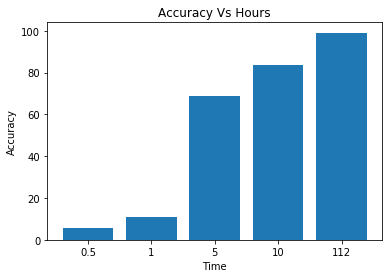

In [130]:
y_pos = np.arange(len(x_bar))
plt.bar(y_pos, y_bar, align='center')#, width=1.0)

plt.xticks(y_pos, x_bar)
plt.xlabel('Time')
plt.ylabel('Accuracy')
plt.title('Accuracy Vs Hours')

plt.show()

# ML - OneHot data

In [15]:
data = pd.read_csv('../SiP_dataset-master/SIP_OneHot.csv', encoding='cp1252') 
data.fillna(0, inplace = True)

data.head()


,Unnamed: 0,Priority,RaisedByID,AssignedToID,AuthorisedByID,HoursEstimate,HoursActual,StatusCode_AUTHORISE,StatusCode_CANCELLED,StatusCode_CHRONICLE,...,SubCategory_Project Management,SubCategory_Release,SubCategory_Research,SubCategory_Staff Management,SubCategory_Staff Recruitment,SubCategory_Support,SubCategory_Technical Specification,SubCategory_Testing,SubCategory_Third Party,SubCategory_Training
0,0,1,58,58,6.0,14.0,1.75,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,58,42,6.0,7.0,7.00,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,2,7,58,6.0,0.7,0.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,5,50,42,6.0,0.7,0.70,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,10,46,13,6.0,3.5,3.50,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# HoursEstimate_filter=HoursEstimate[HoursEstimate["HoursEstimate"]<200]
# HoursEstimate_filter=HoursEstimate_filter[HoursEstimate_filter["HoursActual"]<800]

x_train_label, xx_test_label, y_train_label, yy_test_label \
              = train_test_split(data.loc[:, data.columns != 'HoursActual'].values[:], data[Y_attributes].values[:], test_size=TRAIN_AND_VALIDATION_TEST_SPLIT)
x_valid_label, x_test_label, y_valid_label, y_test_label \
              = train_test_split(xx_test_label, yy_test_label, test_size=VALID_AND_TEST_SPLIT)  

print("Train examples: {}".format(x_train_label.shape))
print("Valid examples: {}".format(x_valid_label.shape))
print("Test examples: {}".format(x_test_label.shape))

Train examples: (8609, 61)
Valid examples: (1845, 61)
Test examples: (1845, 61)


In [27]:

model = tf.keras.models.Sequential([
#     tf.keras.layers.Dense(2048, kernel_initializer='normal'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation(activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.8),
#     tf.keras.layers.Dense(1024,  kernel_initializer='normal'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation(activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.8),
#     tf.keras.layers.add(tf.keras.layers.Flatten(input_shape = (BATCH_SIZE,x_train_label.shape[1],1))),
    tf.keras.layers.Dense(8192, kernel_initializer='normal',input_shape = (x_train_label.shape[1],)), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(2048, kernel_initializer='normal'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(128, kernel_initializer='normal'), 
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation(activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(64, kernel_initializer='normal'), 
#     tf.keras.layers.BatchNormalization(),
#     tf.keras.layers.Activation(activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.8),
    tf.keras.layers.Dense(1)
    
    
#     tf.keras.layers.Dense(1024, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(512, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(256, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(128, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(64, activation=tf.nn.relu),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(1)
])

In [29]:

model.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['mean_squared_error'])

curr_dt = set_curr_time()
tb_callback = tf.keras.callbacks.TensorBoard(log_dir='../logs/{0}'.format(curr_dt), histogram_freq=0, write_graph=True)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=120)


tic = time.time()
model.fit(
    x_train_label,
    y_train_label,
    epochs = 300,
    batch_size = x_train_label.shape[0],
    validation_data = (x_valid_label, y_valid_label),
    shuffle = True,
    callbacks=[es,tb_callback])
toc = time.time()

print('Training time:{}'.format(toc-tic))
pred_y=model.predict(x_test_label)


Train on 8609 samples, validate on 1845 samples
Epoch 1/300
8609/8609 [==============================] - 1s 107us/step - loss: 5259.6235 - mean_squared_error: 5259.6235 - val_loss: 1589.7592 - val_mean_squared_error: 1589.7592
Epoch 2/300
8609/8609 [==============================] - 0s 15us/step - loss: 5206.8779 - mean_squared_error: 5206.8779 - val_loss: 1585.6847 - val_mean_squared_error: 1585.6847
Epoch 3/300
8609/8609 [==============================] - 0s 14us/step - loss: 5168.4824 - mean_squared_error: 5168.4824 - val_loss: 1575.9669 - val_mean_squared_error: 1575.9669
Epoch 4/300
8609/8609 [==============================] - 0s 14us/step - loss: 5125.0601 - mean_squared_error: 5125.0601 - val_loss: 1572.1866 - val_mean_squared_error: 1572.1866
Epoch 5/300
8609/8609 [==============================] - 0s 14us/step - loss: 5114.5664 - mean_squared_error: 5114.5664 - val_loss: 1582.6741 - val_mean_squared_error: 1582.6741
Epoch 6/300
8609/8609 [==============================] - 0s 1

Epoch 47/300
8609/8609 [==============================] - 0s 15us/step - loss: 4856.3428 - mean_squared_error: 4856.3428 - val_loss: 1384.3202 - val_mean_squared_error: 1384.3202
Epoch 48/300
8609/8609 [==============================] - 0s 15us/step - loss: 4886.4229 - mean_squared_error: 4886.4229 - val_loss: 1386.6888 - val_mean_squared_error: 1386.6888
Epoch 49/300
8609/8609 [==============================] - 0s 15us/step - loss: 4828.4810 - mean_squared_error: 4828.4810 - val_loss: 1389.1089 - val_mean_squared_error: 1389.1089
Epoch 50/300
8609/8609 [==============================] - 0s 15us/step - loss: 4881.3374 - mean_squared_error: 4881.3374 - val_loss: 1394.4064 - val_mean_squared_error: 1394.4064
Epoch 51/300
8609/8609 [==============================] - 0s 15us/step - loss: 4866.7070 - mean_squared_error: 4866.7070 - val_loss: 1391.3584 - val_mean_squared_error: 1391.3584
Epoch 52/300
8609/8609 [==============================] - 0s 15us/step - loss: 4883.5054 - mean_squared_e

Epoch 93/300
8609/8609 [==============================] - 0s 15us/step - loss: 4720.4590 - mean_squared_error: 4720.4590 - val_loss: 1442.6033 - val_mean_squared_error: 1442.6033
Epoch 94/300
8609/8609 [==============================] - 0s 15us/step - loss: 4773.4937 - mean_squared_error: 4773.4937 - val_loss: 1452.0680 - val_mean_squared_error: 1452.0680
Epoch 95/300
8609/8609 [==============================] - 0s 15us/step - loss: 4741.0439 - mean_squared_error: 4741.0439 - val_loss: 1454.3629 - val_mean_squared_error: 1454.3629
Epoch 96/300
8609/8609 [==============================] - 0s 15us/step - loss: 4637.5562 - mean_squared_error: 4637.5562 - val_loss: 1456.8203 - val_mean_squared_error: 1456.8203
Epoch 97/300
8609/8609 [==============================] - 0s 15us/step - loss: 4639.9385 - mean_squared_error: 4639.9385 - val_loss: 1464.0544 - val_mean_squared_error: 1464.0544
Epoch 98/300
8609/8609 [==============================] - 0s 15us/step - loss: 4737.6367 - mean_squared_e

Epoch 139/300
8609/8609 [==============================] - 0s 15us/step - loss: 4568.2183 - mean_squared_error: 4568.2183 - val_loss: 1479.8420 - val_mean_squared_error: 1479.8420
Epoch 140/300
8609/8609 [==============================] - 0s 15us/step - loss: 4632.6523 - mean_squared_error: 4632.6523 - val_loss: 1468.2150 - val_mean_squared_error: 1468.2150
Epoch 141/300
8609/8609 [==============================] - 0s 14us/step - loss: 4581.8857 - mean_squared_error: 4581.8857 - val_loss: 1453.9594 - val_mean_squared_error: 1453.9594
Epoch 142/300
8609/8609 [==============================] - 0s 15us/step - loss: 4606.8066 - mean_squared_error: 4606.8066 - val_loss: 1465.6029 - val_mean_squared_error: 1465.6029
Epoch 143/300
8609/8609 [==============================] - 0s 14us/step - loss: 4537.4087 - mean_squared_error: 4537.4087 - val_loss: 1490.5009 - val_mean_squared_error: 1490.5009
Epoch 144/300
8609/8609 [==============================] - 0s 15us/step - loss: 4498.9478 - mean_squ

In [30]:
ERROE_MERGE = 0.5 # in hours
correct = 0
for i in range(0,len(y_test_label)):
    scale_pred = (pred_y[i]*68.72187295)+(+13.17546792)
    scale_test = (y_test_label[i][0]*68.72187295)+(+13.17546792)

    if (((scale_pred - ERROE_MERGE) < scale_test) and ((scale_pred + ERROE_MERGE) > scale_test)):
        correct += 1
print(correct/len(y_test_label))

0.0
